<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/Project/All_algo_property_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv')

In [45]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [49]:
corr = data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [50]:
corr['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [51]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2282a1bbd0>,
      dtype=object)

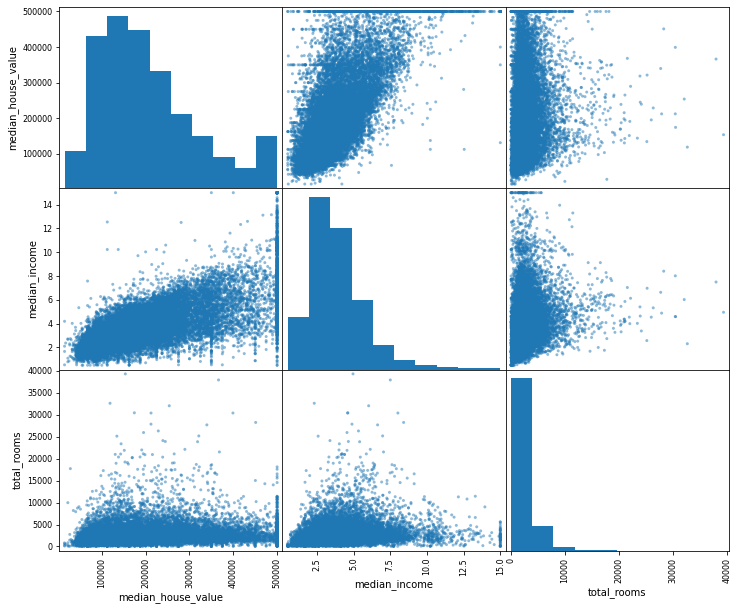

In [52]:
attr = ['median_house_value' , 'median_income' , 'total_rooms']
scatter_matrix(data[attr] , figsize = (12 , 10))

In [53]:
data["bedroom_per_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["rooms_per_households"] = data["total_rooms"]/data["households"]
data["population_per_households"] = data["population"]/data["households"]

In [54]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_rooms,rooms_per_households,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467


In [55]:
data.corr()['median_house_value'].sort_values(ascending = False)

median_house_value           1.000000
median_income                0.688075
rooms_per_households         0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_households   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedroom_per_rooms           -0.255880
Name: median_house_value, dtype: float64

In [56]:

# data = data.drop("ocean_proximity", axis = 1 )

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20433 non-null  float64
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  object 
 10  bedroom_per_rooms          20433 non-null  float64
 11  rooms_per_households       20640 non-null  float64
 12  population_per_households  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ M

In [58]:
median = data["total_bedrooms"].median()
data['total_bedrooms'].fillna(median , inplace = True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20640 non-null  float64
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  object 
 10  bedroom_per_rooms          20433 non-null  float64
 11  rooms_per_households       20640 non-null  float64
 12  population_per_households  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ M

In [60]:
median_per = data["bedroom_per_rooms"].median()
data["bedroom_per_rooms"].fillna(median_per, inplace= True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20640 non-null  float64
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  object 
 10  bedroom_per_rooms          20640 non-null  float64
 11  rooms_per_households       20640 non-null  float64
 12  population_per_households  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ M

In [62]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_rooms,rooms_per_households,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.224625,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.215208,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.215173,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.219892,5.329513,2.123209


In [64]:
data["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [68]:
for col in data['ocean_proximity'].unique():
  data[col] = np.where(data['ocean_proximity'] == col , 1 , 0)
  

In [69]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_rooms,rooms_per_households,population_per_households,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467,1,0,0,0,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20640 non-null  float64
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  object 
 10  bedroom_per_rooms          20640 non-null  float64
 11  rooms_per_households       20640 non-null  float64
 12  population_per_households  20640 non-null  float64
 13  NEAR BAY                   20640 non-null  int

In [71]:
data_num = data.drop('ocean_proximity' , axis = 1)

In [74]:
from sklearn.pipeline  import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 

In [75]:
pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy = 'median')),
    ('std_scaler' , StandardScaler())
])

In [76]:
model = pipeline.fit_transform(data_num)

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attributes = list(data_num)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([('num', pipeline, num_attributes), ('cat' , OneHotEncoder(), cat_attributes) ])

housing_prepared = full_pipeline.fit_transform(data)

In [78]:
housing_original = pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv")
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_original)

In [80]:
housing_label = data["median_house_value"].copy()

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [82]:
some_data = data.iloc[:5]
some_labels = housing_label[:5]

some_data_prepare = full_pipeline.transform(some_data)

print("predicted data: ", lin_reg.predict(some_data_prepare))
print("actual data: ", list(some_labels))

predicted data:  [452600. 358500. 352100. 341300. 342200.]
actual data:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [83]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2455257029661704e-10

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [85]:
housing_prediction = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_label, cv = 5, scoring= "neg_mean_squared_error")

tree_reg_score = np.sqrt(-scores)

tree_reg_score

array([229.28467821, 101.36543687, 120.01695617,  60.28035277,
        96.10888931])

In [87]:
from sklearn.model_selection import GridSearchCV

params_grid = [{'ccp_alpha': [0.1,0.2,0.3,0.4], 'min_samples_split': [2,3,4,5,6,7]}]

tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg, params_grid , cv = 5 , scoring = 'neg_mean_squared_error', return_train_score= True)

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'ccp_alpha': [0.1, 0.2, 0.3, 0.4],
                          'min_samples_split': [2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_result = grid_search.cv_results_

for mean_score, params in zip(grid_result["mean_test_score"], grid_result['params']):
  print(-mean_score, params)

20954.458744077514 {'ccp_alpha': 0.1, 'min_samples_split': 2}
14118.21843399999 {'ccp_alpha': 0.1, 'min_samples_split': 3}
13048.652876291135 {'ccp_alpha': 0.1, 'min_samples_split': 4}
16585.62937351875 {'ccp_alpha': 0.1, 'min_samples_split': 5}
23720.55302382021 {'ccp_alpha': 0.1, 'min_samples_split': 6}
18398.976208144064 {'ccp_alpha': 0.1, 'min_samples_split': 7}
11206.396728573633 {'ccp_alpha': 0.2, 'min_samples_split': 2}
21353.56257159689 {'ccp_alpha': 0.2, 'min_samples_split': 3}
18286.459820735596 {'ccp_alpha': 0.2, 'min_samples_split': 4}
19259.28766916906 {'ccp_alpha': 0.2, 'min_samples_split': 5}
16983.562083897727 {'ccp_alpha': 0.2, 'min_samples_split': 6}
18187.168095525623 {'ccp_alpha': 0.2, 'min_samples_split': 7}
23011.87168012402 {'ccp_alpha': 0.3, 'min_samples_split': 2}
20758.96465493022 {'ccp_alpha': 0.3, 'min_samples_split': 3}
16056.270296618439 {'ccp_alpha': 0.3, 'min_samples_split': 4}
17027.870033510135 {'ccp_alpha': 0.3, 'min_samples_split': 5}
24134.687390745

In [89]:
from sklearn.model_selection import RandomizedSearchCV


params_grid = [{'ccp_alpha': [np.random.uniform(0.1, 2.0)], 'min_samples_split': [2,3,4,5,6,7] , 'max_depth': [int(x) for x in np.linspace(10, 130, num = 20)]}]


tree_reg = DecisionTreeRegressor()

r_search =   RandomizedSearchCV(tree_reg, params_grid , cv = 5 , scoring = 'neg_mean_squared_error', return_train_score= True)

r_search.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'ccp_alpha': [1.673806496394676],
                                         'max_depth': [10, 16, 22, 28, 35, 41,
                                                       47, 54, 60, 66, 73, 79,
                                                       85, 92, 98, 104, 111,
                                                       117, 123, 130],
                                         'min_samples_split': [2, 3, 4, 5, 6,
                                                               7]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
r_result = r_search.cv_results_

for mean_score, params in zip(r_result["mean_test_score"], r_result['params']):
  print(-mean_score, params)

18946.71393837215 {'min_samples_split': 7, 'max_depth': 73, 'ccp_alpha': 1.673806496394676}
24461.795192867685 {'min_samples_split': 6, 'max_depth': 104, 'ccp_alpha': 1.673806496394676}
16031.425655193427 {'min_samples_split': 2, 'max_depth': 92, 'ccp_alpha': 1.673806496394676}
17292.654095141876 {'min_samples_split': 5, 'max_depth': 60, 'ccp_alpha': 1.673806496394676}
19577.939424368193 {'min_samples_split': 3, 'max_depth': 66, 'ccp_alpha': 1.673806496394676}
23482.873412099416 {'min_samples_split': 6, 'max_depth': 10, 'ccp_alpha': 1.673806496394676}
13026.007410325506 {'min_samples_split': 4, 'max_depth': 66, 'ccp_alpha': 1.673806496394676}
20061.10538125896 {'min_samples_split': 2, 'max_depth': 111, 'ccp_alpha': 1.673806496394676}
17682.68429999674 {'min_samples_split': 6, 'max_depth': 98, 'ccp_alpha': 1.673806496394676}
19057.886948318665 {'min_samples_split': 7, 'max_depth': 28, 'ccp_alpha': 1.673806496394676}
